<a href="https://colab.research.google.com/github/SairaHas/Python-Projects/blob/main/A_B_Testing_using_Python_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
pip install -U kaleido

In [78]:
import pandas as pd
import plotly.express  as px
import plotly.graph_objects as go

In [79]:
control_data=pd.read_csv('/content/drive/MyDrive/archive/control_group.csv',sep = ";")
test_data = pd.read_csv('/content/drive/MyDrive/archive/test_group.csv', sep = ";")


A/B testing helps in finding a better approach to finding customers, marketing products, getting a higher reach, or anything that helps a business convert most of its target customers into actual customers.

Campaign Name: The name of the campaign
Date: Date of the record
Spend: Amount spent on the campaign in dollars
of Impressions: Number of impressions the ad crossed through the campaign
Reach: The number of unique impressions received in the ad
of Website Clicks: Number of website clicks received through the ads
of Searches: Number of users who performed searches on the website
of View Content: Number of users who viewed content and products on the website
of Add to Cart: Number of users who added products to the cart
of Purchase: Number of purchases
Two campaigns were performed by the company:

Control Campaign
Test Campaign
Perform A/B testing to find the best campaign for the company to get more customers.

In [80]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


Data Preparation

The datasets have some errors in column names. Let’s give new column names:


In [82]:
control_data.columns=["Campaign Name", "Date", "Amount Spent", "Number of Impressions", "Reach", "Website Clicks", "Searches Received", "Content Viewed", "Added to Cart", "Purchases"]
test_data.columns=["Campaign Name", "Date", "Amount Spent", "Number of Impressions", " Reach", "Website Clicks", "Searches Received", "Content Viewed", "Added to Cart", "Purchases"]

To check if there are null values in the data set

In [83]:
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [84]:
test_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
 Reach                   0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

The dataset of the control campaign has missing values in a row. Let’s fill in these missing values by the mean value of each column:

In [85]:
control_data["Number of Impressions"].fillna(value=control_data["Number of Impressions"].mean(),inplace=True)
control_data["Reach"].fillna(value=control_data["Reach"].mean(),inplace=True)
control_data['Website Clicks'].fillna(value=control_data['Website Clicks'].mean(),inplace=True)
control_data['Searches Received'].fillna(value=control_data['Searches Received'].mean(),inplace=True)
control_data['Content Viewed'].fillna(value=control_data['Content Viewed'].mean(),inplace=True)
control_data['Added to Cart'].fillna(value=control_data['Added to Cart'].mean(),inplace=True)
control_data['Purchases'].fillna(value=control_data['Purchases'].mean(),inplace=True)


create a new dataset by merging both datasets:

In [86]:
ab_data=control_data.merge(test_data,how="outer").sort_values(['Date'])
ab_data=ab_data.reset_index(drop=True)
ab_data.head()

<ipython-input-86-ff7f0f168e16>:1: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation.



,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases,Reach
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,NaN
1,Test Campaign,1.08.2019,3008,39550.0,NaN,3038.0,1946.0,1069.0,894.0,255.0,35820.0
2,Test Campaign,10.08.2019,2790,95054.0,NaN,8125.0,2312.0,1804.0,424.0,275.0,79632.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,NaN
4,Test Campaign,11.08.2019,2420,83633.0,NaN,3750.0,2893.0,2617.0,1075.0,668.0,71286.0


to check if the dataset has an equal number of samples about both campaigns:

In [87]:
ab_data['Campaign Name'].value_counts()

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64

The dataset has 30 samples for each campaign

#A/B testing to find the best marketing strategy.



1.   Analyze the relationship between the number of impressions we got from both campaigns and the amount spent on both campaigns:


In [88]:
figure=px.scatter(data_frame=ab_data,x="Number of Impressions",y="Amount Spent",size="Amount Spent",color="Campaign Name",trendline="ols")
figure.show()

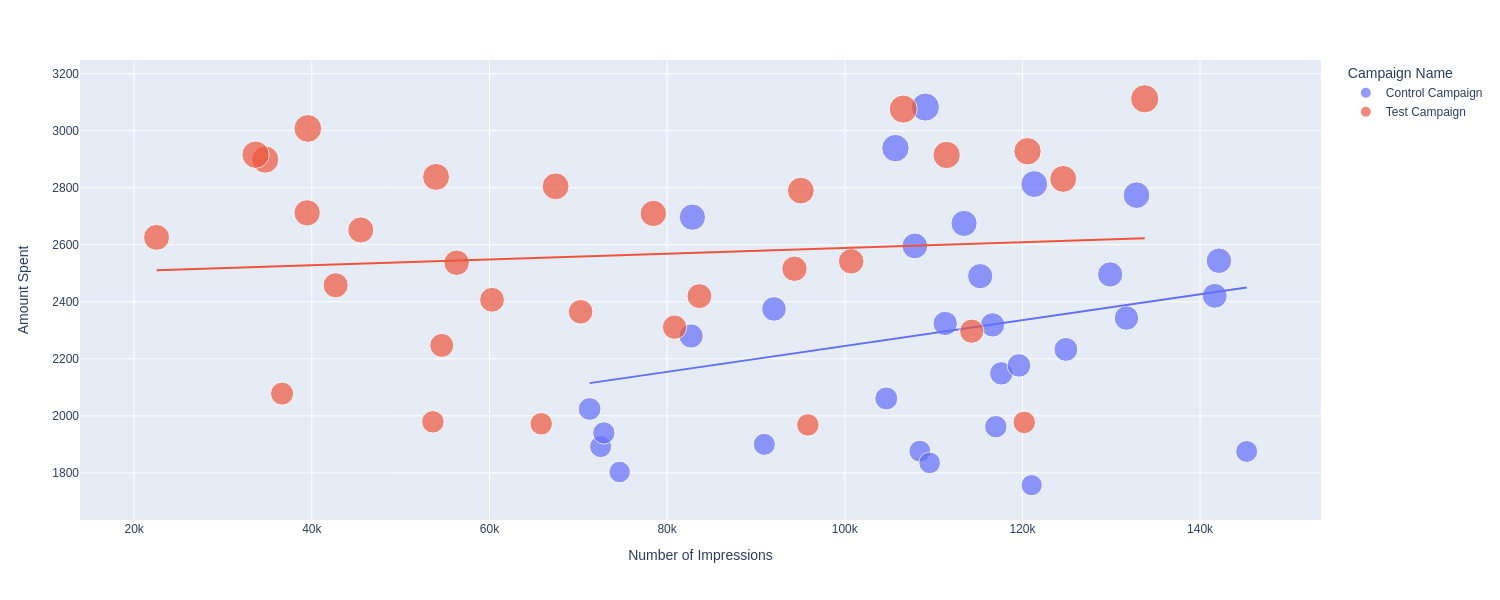

In [89]:
from IPython.display import Image
img_bytes=figure.to_image(format="png",width=1500,height=600,scale=1)
Image(img_bytes)

Conclusion: The control campaign resulted in more impressions according to the amount spent on both campaigns

2. Number of searches performed on the website from both campaigns:



In [90]:
label=["Total Searches from Control Campaign","Total Searches from Test Campaign"]
counts=[sum(control_data['Searches Received']),sum(test_data['Searches Received'])]
figure=go.Figure(data=[go.Pie(labels=label,values=counts)])
figure.update_layout(title='Control Vs Test: Searches')
figure.update_traces(hoverinfo='label+percent', textinfo='value+percent',
                  textfont_size=20)
figure.show()

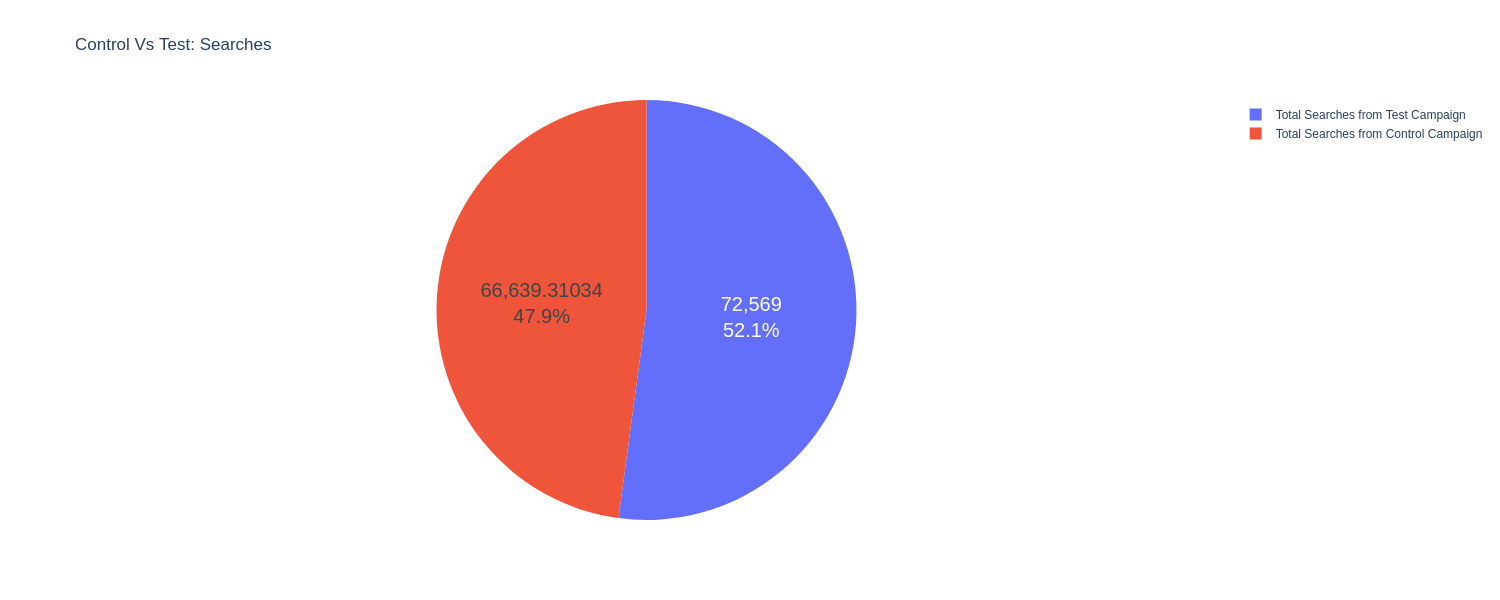

In [91]:
from IPython.display import Image
img_bytes=figure.to_image(format="png",width=1500,height=600,scale=1)
Image(img_bytes)

Conclusion: The test campaign resulted in more searches on the website

3. Number of website clicks from both campaigns:

In [92]:
label=["No: of website clicks from Control Campaign","No: of website clicks from Test Campaign"]
counts=[sum(control_data['Website Clicks']),sum(test_data['Website Clicks'])]
figure=go.Figure(data=[go.Pie(labels=label,values=counts)])
figure.update_layout(title='Control Vs Test: Website Clicks')
figure.update_traces(hoverinfo='label+percent',textinfo='value+percent',textfont_size=20)
figure.show()

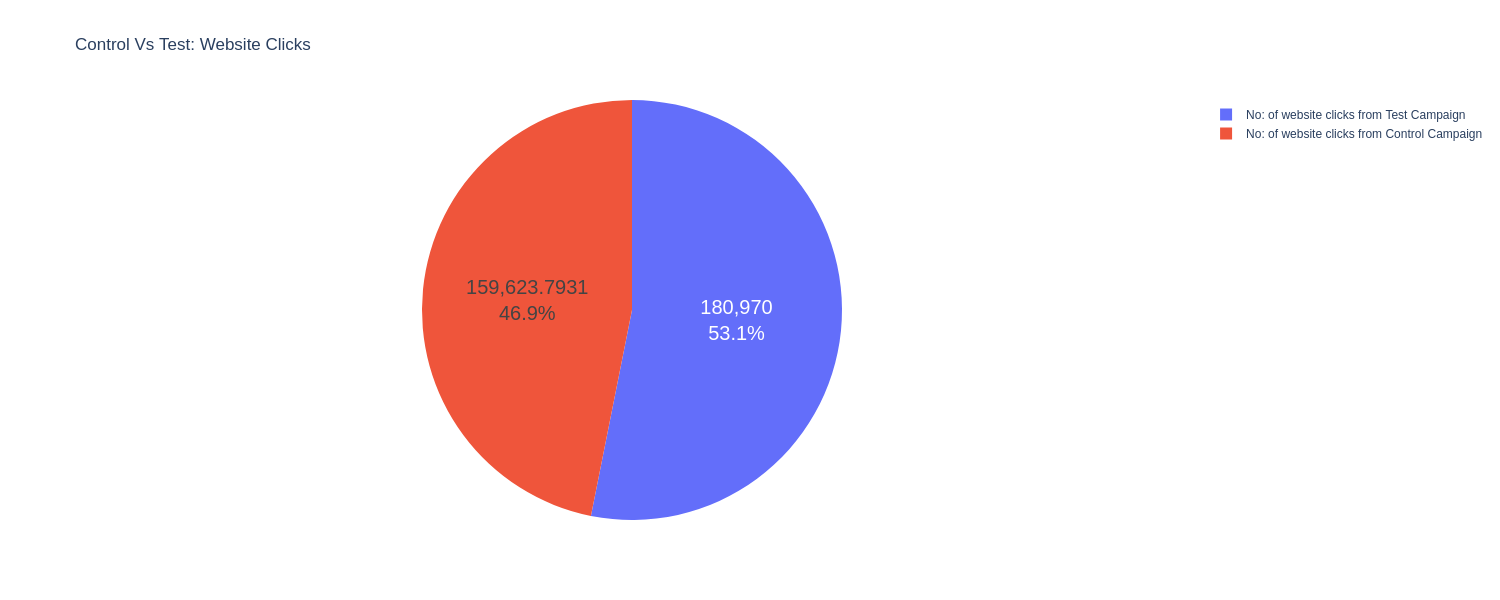

In [93]:
from IPython.display import Image
img_bytes=figure.to_image(format="png",width=1500,height=600,scale=1)
Image(img_bytes)

Conclusion: The number of website clicks is higher in the test campaign

4. The amount of content viewed after reaching the website from both campaigns:

In [94]:
label=["content viewed from control campaign","content viewed from test campaign"]
counts=[sum(control_data['Content Viewed']),sum(test_data['Content Viewed'])]
figure=go.Figure(data=[go.Pie(labels=label,values=counts)])
figure.update_layout(title='Control Vs Test:Content Viewed')
figure.update_traces(hoverinfo='label+percent',textinfo='value+percent')
figure.show()

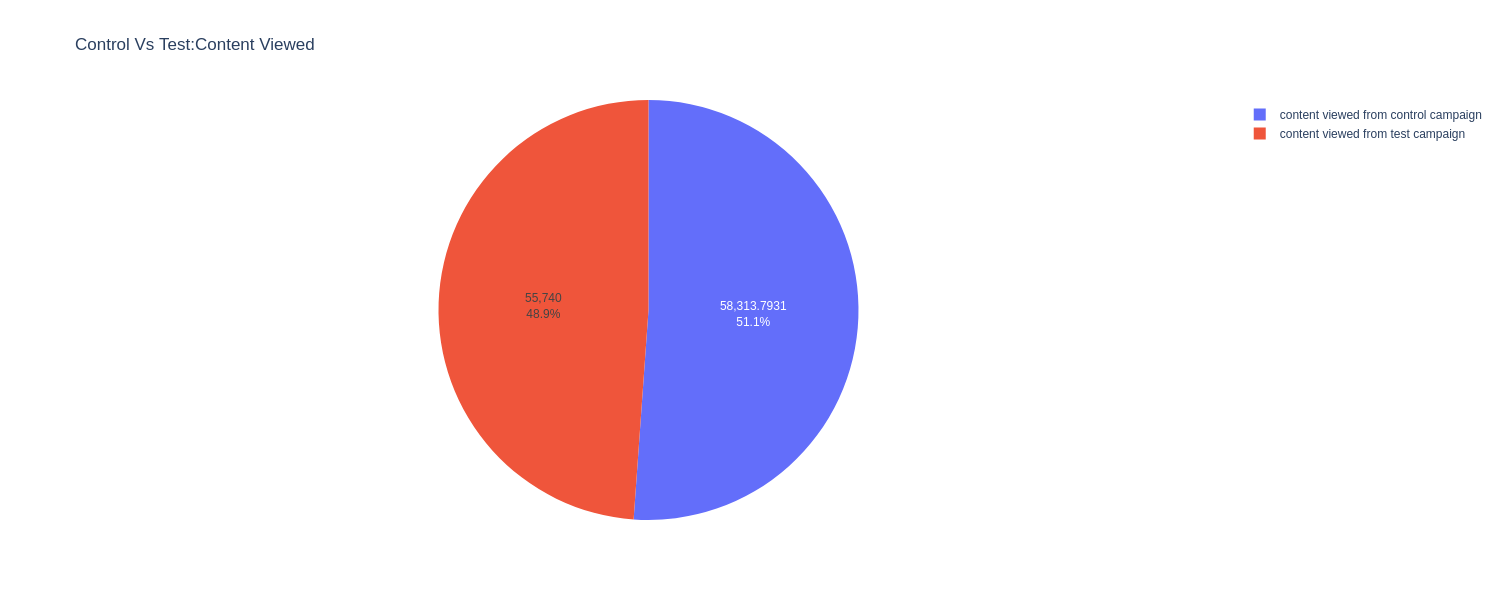

In [95]:
from IPython.display import Image
img_bytes=figure.to_image(format="png",width=1500,height=600,scale=1)
Image(img_bytes)

Conclusion: The audience of the control campaign viewed more content than the test campaign. Although there is not much difference, as the website clicks of the control campaign were low, its engagement on the website is higher than the test campaign.

5. The number of products added to the cart from both campaigns:

In [96]:
label=['No:of products added to cart from Control Campaign','Number of products added to cart from Test Campaign']
counts=[sum(control_data['Added to Cart']),sum(test_data['Added to Cart'])]
figure=go.Figure(data=[go.Pie(labels=label,values=counts)])
figure.update_layout(title="Control Vs Test:products added to cart")
figure.update_traces(hoverinfo='label+percent',textinfo='value+percent')
figure.show()

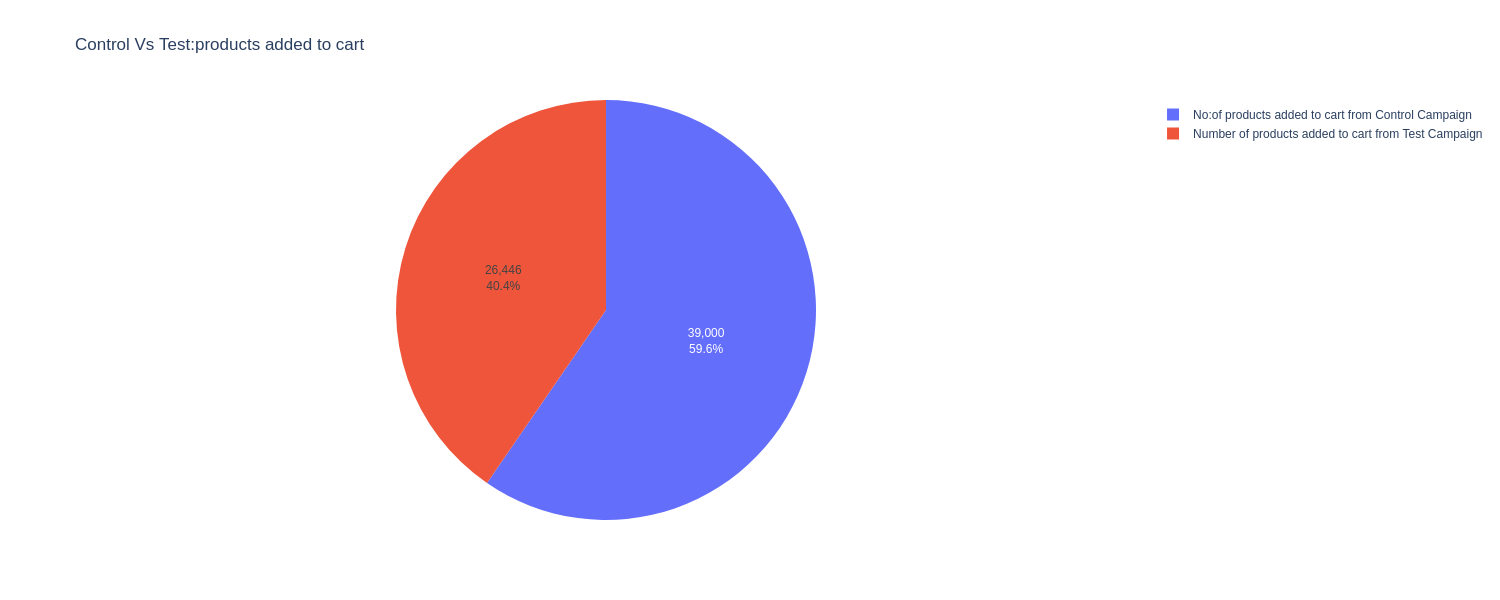

In [97]:
from IPython.display import Image
img_bytes=figure.to_image(format="png",width=1500,height=600,scale=1)
Image(img_bytes)

Conclusion: Despite low website clicks more products were added to the cart from the control campaign.

6. The amount spent on both campaigns:

In [98]:
label=['Amount spent on control campaign','Amount spent on test campaign']
counts=[sum(control_data['Amount Spent']),sum(test_data['Amount Spent'])]
figure=go.Figure(data=[go.Pie(labels=label,values=counts)])
figure.update_layout(title="Amount spent on both the campaigns")
figure.update_traces(hoverinfo='label+percent',textinfo='value+percent')
figure.show()

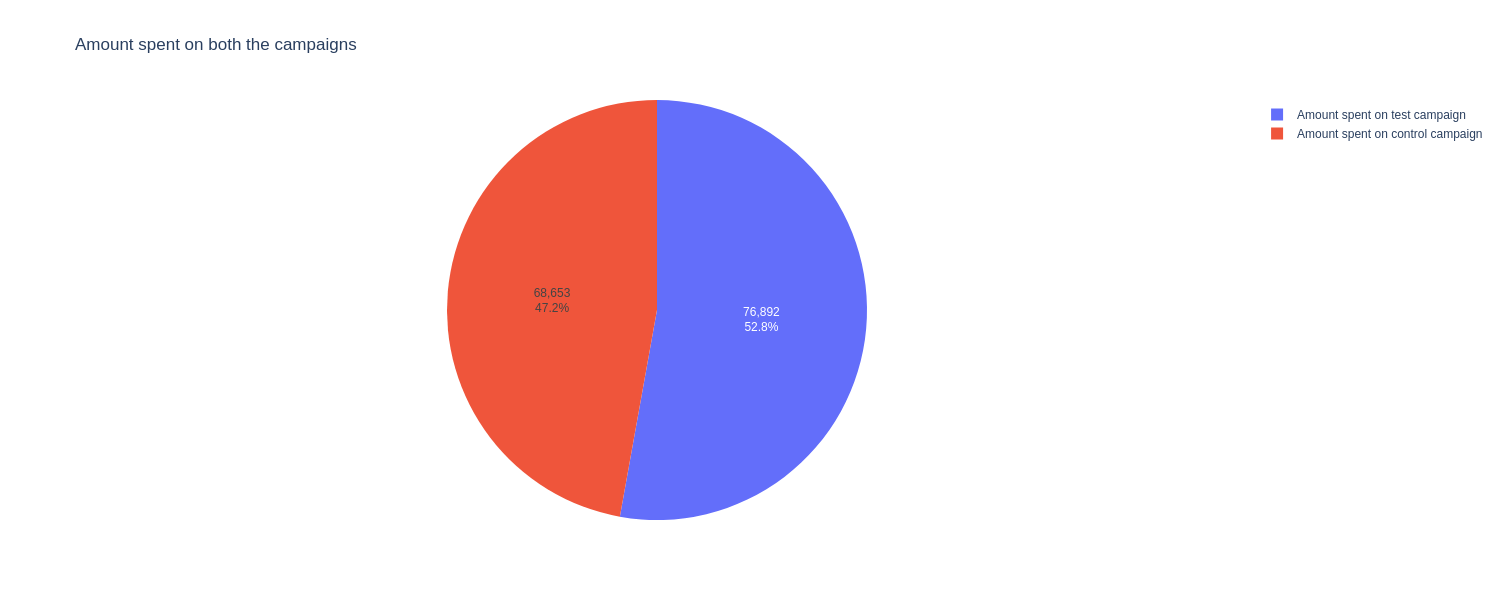

In [99]:
from IPython.display import Image
img_bytes=figure.to_image(format="png",width=1500,height=600,scale=1)
Image(img_bytes)

Conclusion:The amount spent on the test campaign is higher than the control campaign. But as we can see that the control campaign resulted in more content views and more products in the cart, the control campaign is more efficient than the test campaign.

7. Purchases made by both campaigns:

In [100]:
label=['Purchase made by control campaign','Purchase made by test campaign']
counts=[sum(control_data['Purchases']),sum(test_data['Purchases'])]
figure=go.Figure(data=[go.Pie(labels=label,values=counts)])
figure.update_layout(title='Purchase made from both campaigns')
figure.update_traces(hoverinfo='label+percent',textinfo='value+percent')
figure.show()

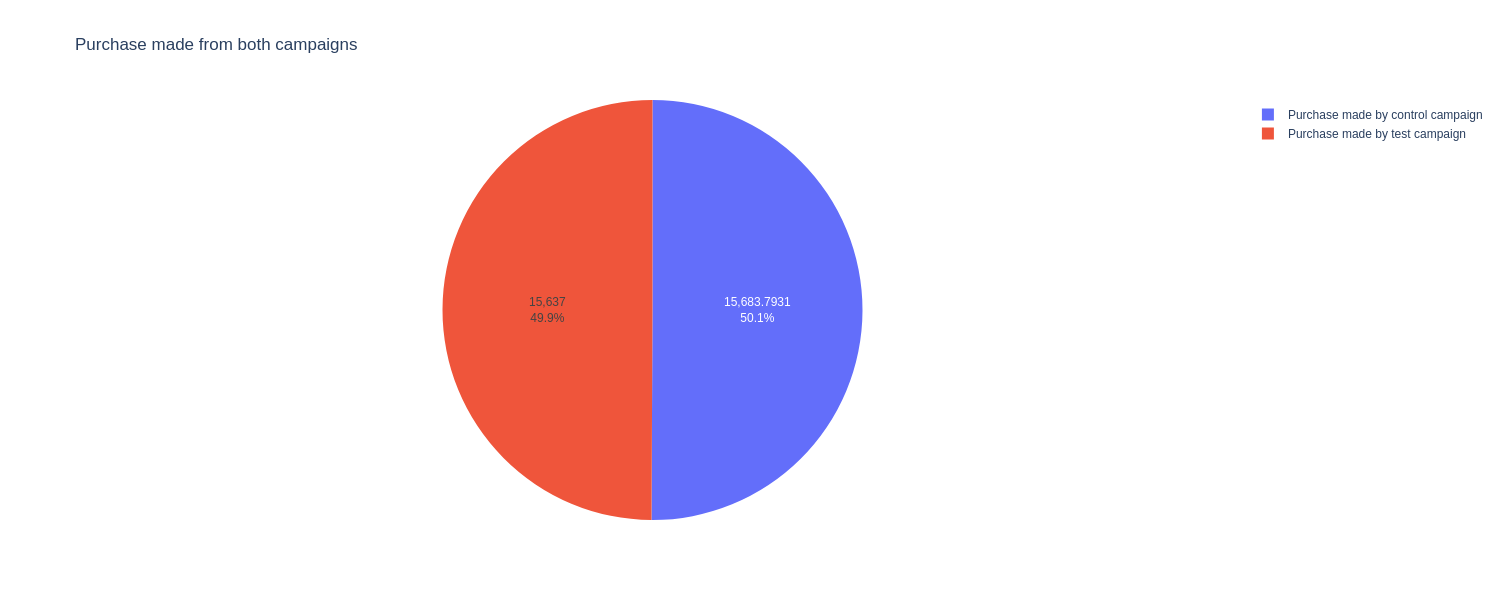

In [101]:
from IPython.display import Image
img_bytes=figure.to_image(format="png",width=1500,height=600,scale=1)
Image(img_bytes)

Conclusion: There’s only a difference of around 1% in the purchases made from both ad campaigns. As the Control campaign resulted in more sales in less amount spent on marketing, the control campaign wins here



8. Relationship between the number of website clicks and content viewed from both campaigns to understand which ad campaign has a better convertion

In [102]:
figure=px.scatter(data_frame=ab_data,x="Content Viewed",y="Website Clicks", size="Website Clicks", color= "Campaign Name", trendline="ols")
figure.show()

Conclusion:The website clicks are higher in the test campaign, but the engagement from website clicks is higher in the control campaign. So the control campaign has better performance.

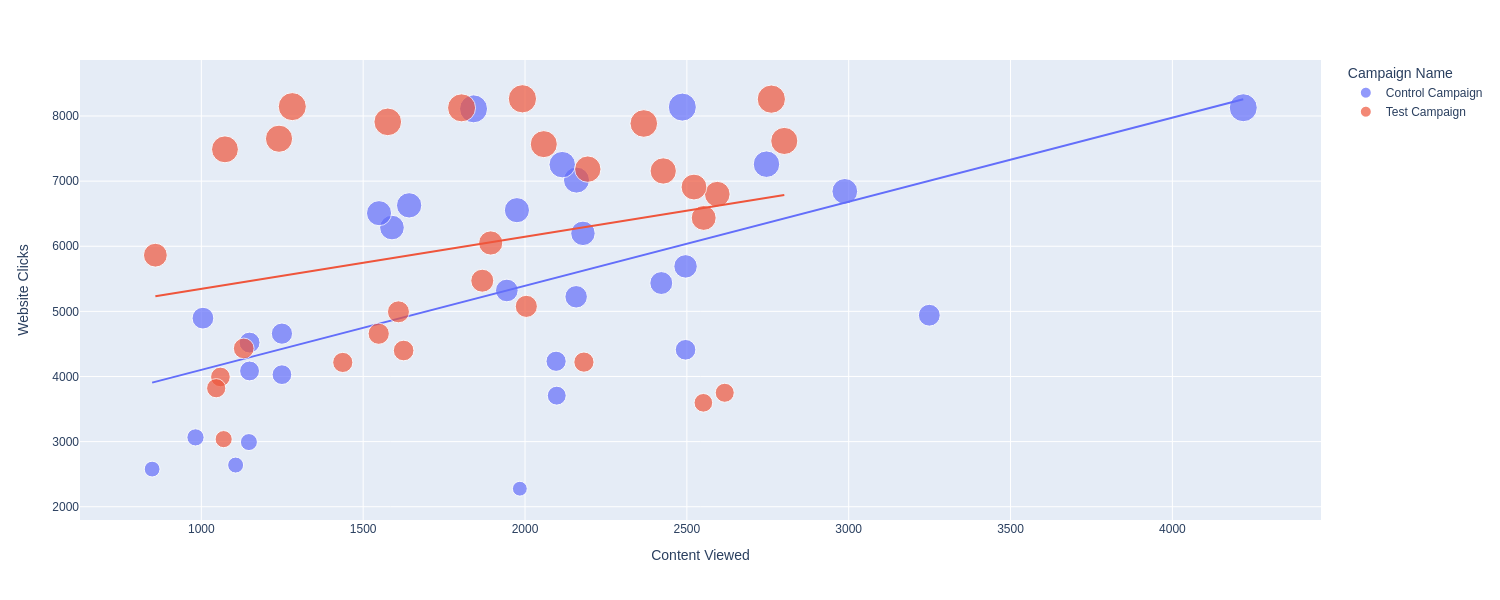

In [103]:
from IPython.display import Image
img_bytes=figure.to_image(format="png",width=1500,height=600,scale=1)
Image(img_bytes)

9. Analyze the relationship between the amount of content viewed and the number of products added to the cart from both campaigns:

In [104]:
figure=px.scatter(data_frame=ab_data,x="Added to Cart", y="Content Viewed", size="Added to Cart",color= "Campaign Name", trendline="ols")
figure.show()

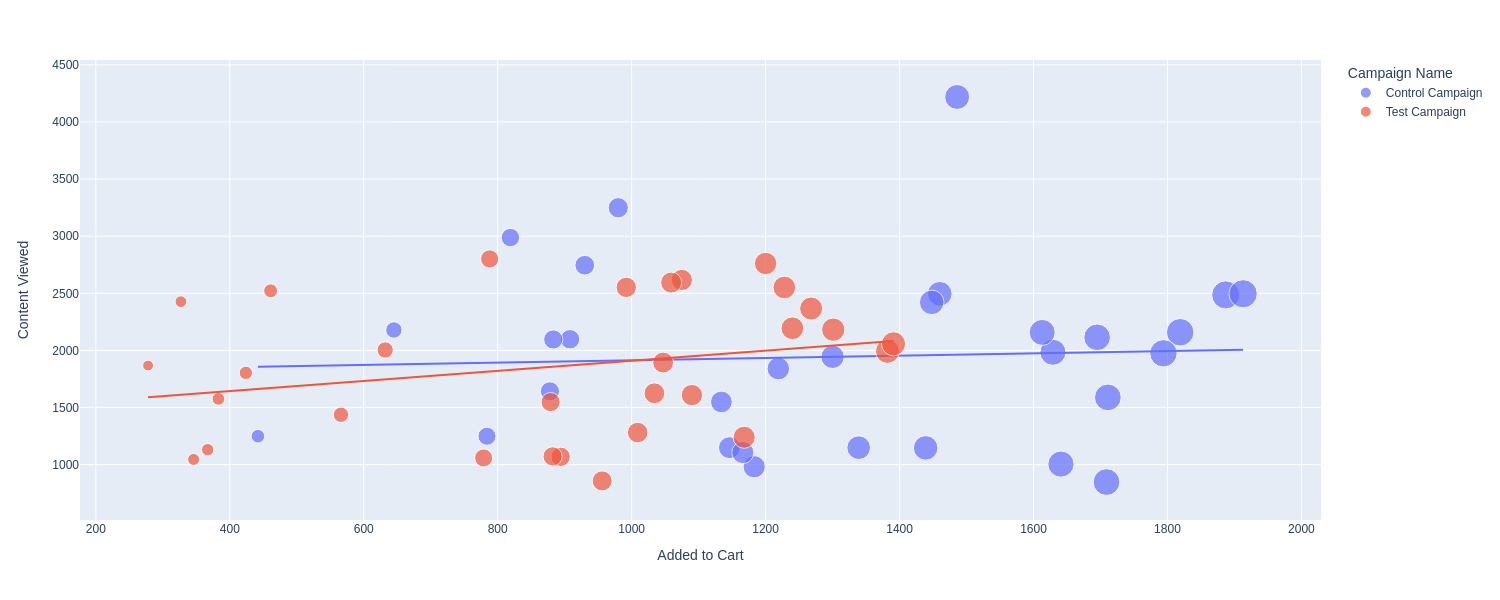

In [105]:
from IPython.display import Image
img_bytes=figure.to_image(format="png",width=1500,height=600,scale=1)
Image(img_bytes)

Conclusion: The control campaign has better conversion

10. Relationship between the number of products added to the cart and the number of sales from both campaigns:

In [109]:
figure = px.scatter(data_frame = ab_data, x="Purchases",y="Added to Cart", size="Purchases", color= "Campaign Name", trendline="ols")
figure.show()

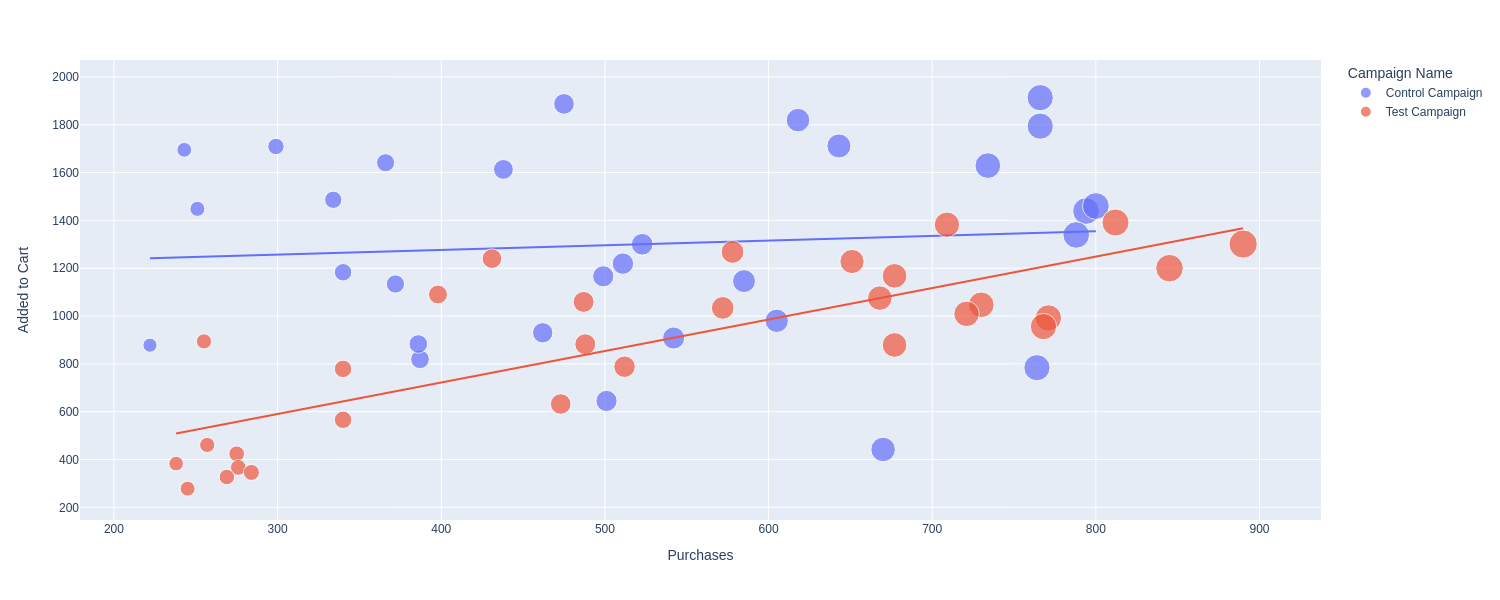

In [111]:
from IPython.display import Image
img_bytes=figure.to_image(format="png",width=1500,height=600,scale=1)
Image(img_bytes)

Conclusion: Although the control campaign resulted in more sales and more products in the cart, the conversation rate of the test campaign is higher.

**Inference:**
From the above A/B tests, we found that the control campaign resulted in more sales and engagement from the visitors. More products were viewed from the control campaign, resulting in more products in the cart and more sales. But the conversation rate of products in the cart is higher in the test campaign. The test campaign resulted in more sales according to the products viewed and added to the cart. And the control campaign results in more sales overall. So, the Test campaign can be used to market a specific product to a specific audience, and the Control campaign can be used to market multiple products to a wider audience.